In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Step 1: Load the dataset
file_path = "fall_data.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, delimiter=",")  # Using correct delimiter

In [ ]:
# Step 2: Compute Acceleration Magnitude
# Convert columns to numeric, errors='coerce' will replace non-numeric values with NaN
df["X-Axis"] = pd.to_numeric(df["X-Axis"], errors='coerce')
df["Y-Axis"] = pd.to_numeric(df["Y-Axis"], errors='coerce')
df["Z-Axis"] = pd.to_numeric(df["Z-Axis"], errors='coerce')

df["acc_magnitude"] = np.sqrt(df["X-Axis"]**2 + df["Y-Axis"]**2 + df["Z-Axis"]**2)

In [ ]:
# Step 3: Label Falls Based on Threshold (Tune as needed)
fall_threshold = 1.5  # A threshold above 1.5g is often considered a fall
df["fall_label"] = (df["acc_magnitude"] > fall_threshold).astype(int)

In [ ]:
# Step 4: Prepare Features and Labels
X = df[["X-Axis", "Y-Axis", "Z-Axis", "acc_magnitude"]]  # Features
y = df["fall_label"]  # Labels

In [ ]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Print Performance Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


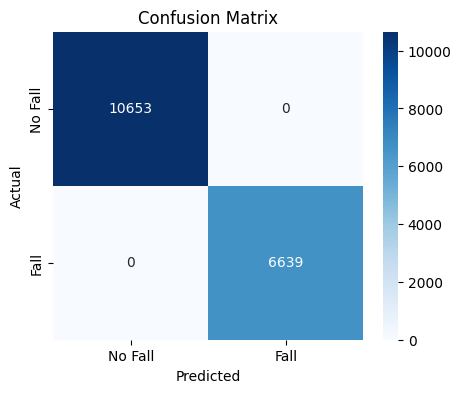

In [ ]:
# Step 9: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib

# Save the RandomForest model
joblib.dump(model, "fall_detection_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
!pip install pyserial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
import time

# Load the trained fall detection model
model = joblib.load("fall_detection_model.pkl")

# Initialize the scaler (make sure to fit on training data first!)
scaler = StandardScaler()
scaler.mean_ = np.array([0.2, -0.96, -0.15, 1.0])  # Example mean from training set (includes acc_magnitude)
scaler.scale_ = np.array([0.05, 0.02, 0.03, 0.1])  # Example scale from training set

def get_sensor_data():
    """Simulated real-time accelerometer data"""
    x = np.random.uniform(-2, 2)  # Simulating X-Axis acceleration
    y = np.random.uniform(-2, 2)  # Simulating Y-Axis acceleration
    z = np.random.uniform(-2, 2)  # Simulating Z-Axis acceleration
    acc_magnitude = np.sqrt(x**2 + y**2 + z**2)  # Compute magnitude
    return np.array([[x, y, z, acc_magnitude]])  # Now has 4 features

print("🔹 Simulated Real-Time Fall Detection Started...")

while True:
    data = get_sensor_data()
    if data is not None:
        # Normalize using the same scaler from training
        data_scaled = scaler.transform(data)

        # Predict fall/no fall
        prediction = model.predict(data_scaled)
        result = "🚨 FALL DETECTED!" if prediction > 0.5 else "✅ No Fall"

        # Display result
        print(f"Sensor Data: {data.flatten()} → Prediction: {result}")

        # If fall detected, trigger alert
        if prediction > 0.5:
            print("🚨 Sending emergency alert! (Simulated)")

    time.sleep(0.5)  # Adjust delay based on sensor frequency

🔹 Simulated Real-Time Fall Detection Started...
Sensor Data: [-1.37858708 -0.11790042  1.12390276  1.78257125] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.68718187 -1.616436   -1.86293845  2.56039527] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.85603347 -0.3334594   0.20989093  0.94236016] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.28772885  0.23148928  0.6879331   0.78078622] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.60255571  1.41322983 -0.75942118  1.71377141] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.06753874 -1.60904152  0.50759858  1.68855927] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.51098345  0.46599603 -0.06601142  0.69470418] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.12405276 -0.2145541  -1.36550519  1.78160952] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.13580864 -0.88345538  0.1299841   1.44480121] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.10394534 1.66840906 1.53991252 2.27282292] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.7625632  -0.25141378 -0.69278686  1.91044276] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.40498638  1.18523229 -1.3758788   2.29604111] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.50271348 -0.01985088 -0.190585    1.51488102] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.38882503  0.38440098 -0.88715379  1.04210885] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.16261513 -1.52522035  0.22687351  1.55055228] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.37575086  0.73021965 -1.58514122  2.22229248] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.15691608 -0.12807267  0.97035435  1.51540258] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.2311918   0.15205806 -1.42275317  1.44941294] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.99178787 -0.74799456  0.34028126  2.15464756] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.22364445  1.41597448  1.90259853  2.66873952] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.94790603 -0.95653342  1.59015437  2.69033177] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.13253148 -1.04827639  1.63806933  2.25050707] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.40416286 -0.71323275 -0.19309123  0.84221897] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.79869291  1.83596469 -0.36964197  2.5966705 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.11511521 -1.6012268  -0.93136737  1.85596982] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.2678772  1.0612261  0.88379985 1.4067911 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.37654253 -0.08159337  1.28660727  1.34305622] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.23022522  1.43512494  1.41272986  2.35983969] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.61610729 -1.15189658 -0.90381439  2.18072212] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.89325694  1.44460543 -1.15220134  2.64553862] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.05984328  1.93124974 -1.65594186  2.75592757] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.88077765 0.12844054 0.46964957 1.94277952] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.51043102  1.16044564 -0.82673812  1.51349589] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.40585707  1.64496557  0.6777689   2.26753534] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.17561845  1.71211943  1.54931051  2.59109913] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.09191248  1.72706917 -1.58363223  2.34501746] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.54572615 -0.08477888  1.36677056  1.47413237] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.90051557  1.77821931 -0.74681197  2.12854888] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.72282648  1.50557423 -0.63063641  2.37330721] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.34101126 -0.31388038 -1.37707025  1.45297352] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.27290785  1.48124684 -0.69472455  1.65867811] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.22285467 0.7933699  1.30057265 1.95353489] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.35630147  0.81841589 -1.51374941  1.7573254 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.27526869 -0.07847728  0.8165888   0.86530273] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.84966847  0.48242347 -1.90434531  2.69824701] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.35922455 -1.9778457  -1.77816828  2.68380296] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.38721677  0.85474614  0.71254446  1.17823911] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.63283811 -0.13664418  1.54526386  1.67540923] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.69948642 -1.47148948 -0.62967692  1.7467271 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.64446883 -0.41565946  0.39890526  0.86442945] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.47244933 -1.59753127 -0.15982422  1.6735765 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.41698592  1.47120971 -0.62546963  1.65213424] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.87174433 -1.52089876 -1.36588473  2.22232137] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.32809636  1.62248501  1.92460868  2.846123  ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.34754897 -0.79337609 -0.8042817   1.18199194] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.20437419 -0.68677182  0.19603414  0.74286858] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.57975975 -0.67350807  0.14900557  0.90107556] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.43773628 -1.76256315 -1.17073001  2.16075234] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.87648949 -0.28676175  1.96315922  2.16897677] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.47687492 -1.45183246  0.69335744  2.18396922] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.21838211 -0.402098    0.67473372  0.81525403] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.25294324  0.79225055 -1.39375629  2.03471971] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.24867059 -0.70641584 -0.80401386  1.09877145] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.37977416 -0.09267839 -0.61240749  1.51241824] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.61495147  1.47658926 -0.67316189  2.28943902] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.77291267 -0.41569481  0.86782894  1.23422981] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.86579006 -1.55559439 -0.43221041  1.83201315] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.88273232 -0.20393752  1.93260424  2.70577727] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.90795125 -1.92687709  1.73644912  3.21999827] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.44992784  1.94989562 -1.90079203  2.75998883] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.79929703 0.86817136 1.84588843 2.72001754] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.35785595 -0.34644412 -0.34340471  1.44281776] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.69449235  0.11625531 -0.77606688  1.04790969] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.85104821 -1.85541503 -0.36658951  2.64638098] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.35049711  0.48081326 -1.66162137  1.76494056] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.17592081 0.20581303 0.01355189 1.19387286] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.89667453  0.04663046 -1.26024068  2.27766442] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.54612928  0.53727819 -0.57855781  1.73606243] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.01386818 -0.52885225  1.04527928  1.17153139] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.55376179 -0.24136675 -1.13356933  1.28448023] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.89197045 -1.66537475 -1.90428819  2.68242387] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.73191309 0.84416124 1.47161722 2.42441506] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.11978659  1.38922212 -1.10044045  2.09638481] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.84317536  0.81001446 -0.43270572  2.0592846 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.52181263  0.08597976 -1.71599796  1.79564193] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.59205008  0.32414021 -1.88502621  2.00222726] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.34139132 -0.82509706  0.72619231  1.15095111] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.61094684  1.97179608  0.40254044  2.10315825] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.68513366 -1.47816172  0.88168746  1.85249642] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.37565567 -1.17831639 -1.55485973  2.38714198] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.14011365 -0.75051086 -0.10811394  0.77109469] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.80784437  1.8177149  -0.20692989  2.5720048 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.93826167 -1.26479014 -1.34962095  2.67918441] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.07895282  1.62999542 -0.84887834  1.83948717] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.13032286 -0.79179296 -1.71443705  2.20087716] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.40033374  1.06953837 -1.29670967  1.72789913] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.55683347 0.26211292 0.64602026 1.7058065 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.70391701  0.37850128  0.69881391  1.88014289] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.53670128 -0.38342187  1.96128897  2.52093586] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.18851524 -1.51211409  1.2365756   1.96243375] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.99178071  0.16718177  0.04710448  1.99933964] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.16684509 -1.41596815  1.70942084  2.22596556] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.63001087 -0.8520788  -1.16543344  2.1774317 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.12816376 0.05984694 0.57229685 1.26643547] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.62037633 -0.40726465  1.91591115  2.05461598] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.66537722  1.56960294 -0.60654908  2.36749582] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.12978648 -1.68982841  1.77448435  2.45380506] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.93069452 -0.56683757  1.05549019  1.51708822] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.43202902 -0.62463844 -1.49596398  2.16305075] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.83472558 -0.68477954 -0.10755722  1.96130302] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.62335479 -0.28833898 -1.9162024   2.52789474] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.39314488 -0.99197418  0.787859    1.88297298] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.69902062 -1.2957751   1.63405683  2.68995277] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.40735875  0.53044729 -1.93087167  2.04342382] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.53201246  1.69825082 -1.47538519  2.31167787] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.37674759 -1.62281103 -1.73753589  2.74735882] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.9522753   1.97158606  1.43212082  3.12241901] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.78443543 -1.21860478 -0.61286383  1.57351156] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.71428599 1.50914482 1.109968   2.53935494] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.89343601 1.41879718 1.36214367 2.73011369] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.47642255 -1.12808156  0.93940156  1.54337998] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.27416784  0.09867156 -1.16346922  1.72826514] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.23527938 -1.92020252  1.02904714  2.5044023 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.47351362  0.12276484 -0.43807999  1.54215034] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.34009543  1.29235243 -1.23879089  2.23620961] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.63264299  0.05232776 -0.91658792  1.11494788] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.3927011   0.98571982 -0.170503    1.7147394 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.86947678  1.03639673  1.28995166  2.49660507] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.190734    1.85561352 -0.73048961  2.32266314] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.98961806 1.61815914 0.67633058 2.0137542 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.2030337  -0.62846552 -1.52271503  1.65977488] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.25489365  1.95207795 -1.6028087   2.53861671] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.75127209  1.20910369  1.87160195  2.83403944] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.60215663 0.27748445 1.02907697 1.22416896] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.24978463 0.83930063 0.37372994 0.95209872] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.46237347  0.1133448  -1.43343049  2.05087936] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.05720173  0.94301145  1.44434653  2.02313692] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.66491903 -0.91188887 -1.31768601  2.31079924] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.00558928 -1.06832062 -0.91264559  1.72784279] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.47544785  0.49282912 -0.56287121  1.65428259] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.54687152 -0.2688289   1.60683029  1.71849965] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.77305273 -1.78318177 -0.59339104  2.03210744] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.98399801 -1.77599677 -0.69838941  2.75284588] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.71559283 -0.55263694 -0.15067761  0.91661575] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.22143385 -1.55553495  1.57293407  2.52699648] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.38936826 -1.33973133 -1.53162934  2.07180504] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.9144389   1.01618883 -0.18775014  1.37988708] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.98438056 0.1972925  0.88865306 1.34075862] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.17565565  1.91887036 -1.545855    2.73018266] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.86404919  0.87710861 -0.31412712  2.08390852] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.79863029 -0.99205095 -0.63485689  2.14994867] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.65510325 -0.94782218 -1.73477414  2.57821159] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.02508026 -1.34162787 -0.58869009  1.7881026 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.38856194 -1.09761287  1.20744505  1.67739618] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.82197803 -1.8738379   0.49867329  2.6607419 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.15933941  0.74171637 -1.53681391  1.71386383] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.81498262  1.56820268  1.38471444  2.24519273] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.994757   0.97258137 0.67205331 2.3187552 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.80821296  1.715385    1.43987535  2.87844069] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.11342881 1.99780487 1.2235974  2.59386557] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.84593071 -0.71614385 -1.28113419  1.69403825] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.19894326 -0.12899742  0.51081286  1.30959347] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.6141673  -1.37690077  0.82589228  1.7190565 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.94787462 -1.5526819   0.3139872   1.84604316] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.94452971 -1.87067717 -0.00405213  2.0956111 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.43280415 0.60348226 1.47048944 1.64737654] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.05855795 -0.0438129   1.93411514  1.93549735] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.36872921 -0.09956082  0.10583726  1.37642055] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.2438483   0.28463894 -1.37546342  1.42561599] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.66545416  1.97973547  1.08565528  2.35389659] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.52795327  1.30467988  0.30222685  2.0317903 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.35732577 -1.11091779 -0.91788809  1.97964394] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.3495652  -0.92863316 -1.55966344  2.26190977] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.92754795 -1.33702535  1.66633477  2.87745538] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.12448674 -0.22647486  0.94351447  1.48525447] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.02596731 -1.34109306  0.20002141  1.35617604] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.47218606 -0.32071791 -1.20955797  1.93215482] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.13442872 -0.38396314  1.85846318  2.21093681] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.9194885   1.38177558 -1.82087174  2.46380534] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.62768397 0.13055174 0.72844857 1.78802578] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.36623485  0.52435903 -1.76207847  1.87456686] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.06047719 -0.97854593  0.80949669  1.65452376] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.85528193 -0.37733655  0.96473431  1.34335488] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.984528    0.17090307 -1.95266675  2.78934879] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.56844703 0.03882542 1.96334664 2.04435062] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.66053668 -1.98897209  0.25263466  2.11095783] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.45290652  1.42929324  0.27309851  1.52400337] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.67299206 1.17818592 1.40498153 1.95320594] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.96393414 -1.99417344 -1.04320058  2.98697715] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.65651528 -1.72183558 -0.5556334   1.924697  ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.94844737  1.30130539 -1.53123776  2.7990234 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.26562668 -1.3094783   0.27142353  1.36343745] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.26269076  0.51279569  1.76326274  1.85500979] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.53199155  1.56535    -0.01309349  2.19031737] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.46577916 -1.7955687   0.36174484  1.88994087] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.01415167  1.09376799 -1.73259946  2.04900698] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.2152457  0.5019413  1.71043807 2.15739787] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.06345108 -0.88482255  1.12254161  1.43074688] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.57892517  0.58252941 -1.63376851  2.3455372 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.18228655  1.45080283 -1.62107236  2.18310166] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.69289835 0.42930539 0.47782572 1.81066986] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.71555781  0.38128994 -1.10950769  2.0783474 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.85233956  1.9149308  -1.55873773  2.61210757] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.49331762 -1.96418309  0.31525912  2.04957698] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.69030374 -0.41236835  0.71479462  1.07587093] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.87104857 -0.65412573  1.65420989  2.58168813] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.96843328  1.68554662 -0.43696069  2.62806614] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.72432503 1.56572902 1.81340364 2.50291567] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.42179543  0.93485057 -1.40333323  1.73816027] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.94685731 -1.28230734  1.52808287  2.78740072] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.51409667 -0.46214311  1.69175601  2.31691679] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.63797853 1.70745995 0.14615043 2.37060184] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.74777902 -0.38667499 -0.55637493  1.0090808 ] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.84034551 0.56931997 1.6965109  2.5669332 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.80060859 -1.82248565 -0.83237439  2.15760868] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.51238704 -1.217221   -1.73298023  2.17885014] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.22715389  0.15451854  0.39333537  1.29788111] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.33641019 -0.4971125  -0.46662038  0.76028102] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.42447548 -1.33666456  0.84380667  2.12786565] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.93634162  0.2912311  -1.94900029  2.76275887] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.3671162  -1.08714047 -1.14308811  2.08747013] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.71574366  0.13780655 -0.69960871  1.01031282] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.90368987 0.59689732 0.60313447 2.08424872] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.71060771 -0.435436   -0.70356283  1.90020628] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.85368175 -0.6064519   1.59729197  1.90994714] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.72097992  0.76810418 -0.35727981  1.91817746] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.822509    0.72074251  1.77567094  2.08542517] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.90872841  0.47040271 -0.17462185  1.9735794 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.66819486 -0.43960673  1.77568973  2.47572256] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.4720199  -1.91397572  1.77362701  2.65176519] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.26589205 -1.20410611  1.49838116  2.30162993] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.62591715 -0.6341161   1.15309548  2.0917311 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.03677913 -0.82878083 -0.76315189  1.12722277] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.19114879 -0.37676982  1.31546263  1.81417553] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.745856   -1.4164583   1.03862288  1.90824338] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.00233798  1.72854086  1.99721507  2.82513769] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.217201   -1.17208655  0.80918977  1.44074677] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.49416579  0.64641709  0.20506385  1.64086491] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.57602221  0.69573502 -0.13993976  1.72843176] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.33898626 1.28040494 0.46319659 1.90967853] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.13884602  0.54768416 -1.83728315  2.22991874] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.63627426 -1.8495028  -1.43273038  2.85495541] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.22738934 -1.33074702  1.55980951  2.06291038] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.97623457 -0.39167303  1.62255627  2.58681265] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.42325782 -0.74464747  1.56514992  1.78419206] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.96959949 -0.2485922   1.31133538  2.37922691] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.02375762 -1.34296117  0.67585717  1.81890277] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.69061813 -0.59537562 -1.11911438  1.44355205] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.91639918  1.08951582 -1.37606219  2.59868769] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.23354395 -1.26674288  0.41413142  1.81597716] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.0870319   1.55567319 -1.97604345  2.51643425] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.12374533  1.67517275 -1.91262767  2.54551787] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.09216041 -0.07610881  0.80541066  1.35915166] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.56066569  1.69588284 -0.05646306  1.7870514 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.84192556  1.10671287  1.78315861  2.26126218] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.14522876  1.79628034 -0.36073403  2.16062515] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.74847789 -0.28326156 -0.75922216  1.92713008] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.7185125   1.64183967 -1.77007451  2.96345854] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.87765925  1.57218789 -0.71557296  2.55135723] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.63992341 -1.26055703  0.99938567  2.29719928] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.05770674 -1.9331187   1.8048494   2.64532783] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.08619125 -1.2286586   0.94325198  1.55137204] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.18533802  0.85126274  1.74176467  2.2723157 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.98526329 -0.12413244 -1.81462797  2.69249956] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.40054606 0.95465207 1.14434908 2.04509771] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.2878767   1.80802924 -1.48726036  2.67199167] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.88352925  1.28936799 -0.77774151  1.74584524] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.07375535 -0.151641    0.56490197  1.22272637] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.47565727  1.44913942 -1.45429436  2.52834759] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.74314814  0.93937194 -0.7398011   1.40783325] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.60786488 0.82072576 1.23143959 1.59985435] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.73124614 -0.20781769 -0.71832586  1.88584025] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.00935788 1.07689799 1.90954093 2.4134745 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.97004335 -1.70259751  1.58689458  3.04928573] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.54922092 -0.98415059 -0.40253131  1.19675706] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.94967771 -0.86996532  1.50214457  1.97867777] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.40227553 -0.39699106  0.09973023  1.46079591] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.38196343 -0.25628539  1.07375169  1.76874187] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.67147094  1.65098897 -1.12176576  2.10594307] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.12514248 -1.63562112 -0.78735541  1.81957293] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.54247124 -1.49917856  1.99724848  2.55554552] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.0435346  -1.37256804 -0.11316677  1.72792193] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.76956639 -1.10200507 -1.70857552  2.17390845] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.2050906  -1.94650366 -1.07312728  2.23216057] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.62183443 1.73862752 1.94924307 3.07452779] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.27383089 1.88032488 1.63578155 2.79893696] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.01582485 -0.13898241  0.44926768  0.4705401 ] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.4764173  -0.59096725 -1.13905831  1.95614523] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.7497352  -0.52256637 -1.08704321  1.42015542] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.86714199 -0.15019473  0.27461914  1.89319659] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.88790094 -1.12564099 -0.58165067  1.54717588] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.5887125   0.36557212 -1.87835563  2.48714098] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.79233372 -1.8891224   0.66044077  2.68652668] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.06264206 -0.73350356 -1.55836743  1.72350241] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.05338041 0.82338201 1.92862566 2.34673499] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.04227569 0.31486077 0.28266346 1.12488868] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.76211597  0.34240536 -0.77284811  1.13813724] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.26092802 -1.80273111  0.9718723   2.06457227] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.85869844 1.50655566 1.19152811 2.67286533] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.16219994  1.41953228 -1.2752225   1.9150909 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.8945111  -0.42342627 -0.32375425  1.96806477] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.74099022 -1.48651383 -1.8419455   2.48023247] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.48877808 -0.12167233  1.07522643  1.8404826 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.58681059 -1.32114452 -1.4589643   2.52823407] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.25918861  1.5068922  -1.63075805  2.23545849] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.76454855  1.57983434  1.31744272  2.7101962 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.45751163  1.2545642  -0.43893897  1.9725463 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.11205531 0.92248538 1.0616262  1.41088123] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.03748435 -0.36892816 -0.79165213  0.8742003 ] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.30450533  0.58047616 -1.17984143  1.34970437] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.02900141 -0.56255638 -1.53567194  1.63572586] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.20325273  1.77068357  1.39991792  2.2663632 ] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.9254898  -0.17387564 -1.50955008  1.77918676] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.6981739  -0.29191613  1.64114855  2.37957521] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.35128924 -1.77643092  1.36842918  2.61806948] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.40706339 -0.94586819  0.87647547  1.35224868] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.71051847 -0.6718212  -1.24345822  2.21887483] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.09911929 -0.14472551 -0.07949191  1.11145295] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.20568915  0.51164434 -1.05889859  1.68426022] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.27006207 -0.68125629  0.27015662  0.78104306] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.03515954 -0.60535994 -0.68831827  1.38267782] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.11229201 -0.771823   -1.82062361  1.98065407] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.15384073  0.79783004 -0.72243886  1.57790973] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.98456305 -1.51518316  1.59155156  2.96096384] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.35412012  0.55882631 -1.66573269  1.79230391] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.0748037  -1.87036578 -0.98631623  2.37198037] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.53355491 -1.80339169  1.05606867  2.15689209] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.82123632  1.01505704 -1.41251594  1.92353091] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.2083794  -1.19627566  0.10202261  1.21856721] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.96693274 -0.42762149 -0.1663129   1.07027054] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.463773   1.51520902 1.1688982  1.96907764] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.58898061 -1.13646361  0.76885139  2.09941454] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.93295746 -1.91375548 -1.03674813  2.36806173] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.45307164 -0.645799    0.87272933  1.81387155] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.60949262 -0.32058156  1.58653457  1.72955073] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.74178748 -1.62842064  0.38595488  1.83056375] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.3063447  -1.54950518  0.43003949  2.07181967] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.9334067  -0.28847959 -1.1485003   2.26723066] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.17607585 0.73204873 1.91603702 2.05866362] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.57107206  1.92498562  0.98505273  2.67285726] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.09785324 1.12972098 0.02306985 1.13418559] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.82403805 -1.15060992  1.75325801  2.25318786] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.48656397 -0.40559582  0.70901686  0.95076673] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.33839325 1.79677793 1.86308498 2.61036522] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.49093087  1.22993118 -0.73463479  2.06767837] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.7413192  -0.96319468 -1.54512814  2.51939626] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.07598506  0.17032781 -1.49799988  1.85223083] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.38944117  0.37157609 -0.52359004  0.75091926] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.80263369  0.1255914   1.65509458  2.45042844] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.46994689 0.28362028 0.45764449 0.71465308] → Prediction: ✅ No Fall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-0.69442866 -1.15653454  0.95657471  1.65373471] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [0.09435829 1.83159794 1.02507986 2.10105764] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [1.94223159 1.13148983 0.98849358 2.45553504] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.86685737 -0.336987   -0.34174656  1.92756515] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [-1.23257598 -1.17023894  0.77804602  1.86924004] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.54252982 -1.03677276 -1.8270174   2.16961493] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 0.88303993  0.40817421 -0.70738029  1.20281028] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sensor Data: [ 1.28766211 -1.03734287 -1.35857401  2.14006479] → Prediction: 🚨 FALL DETECTED!
🚨 Sending emergency alert! (Simulated)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
import numpy as np
import joblib
from pydantic import BaseModel

app = FastAPI()

# Load the trained model
model = joblib.load("fall_detection_model.pkl")

# Define request structure
class SensorData(BaseModel):
    x: float
    y: float
    z: float

@app.post("/predict")
def predict_fall(data: SensorData):
    # Compute acceleration magnitude
    acc_magnitude = np.sqrt(data.x**2 + data.y**2 + data.z**2)

    # Prepare data for model
    features = np.array([[data.x, data.y, data.z, acc_magnitude]])

    # Predict fall
    prediction = model.predict(features)
    result = "FALL DETECTED" if prediction[0] == 1 else "No Fall"

    return {"prediction": result}